# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config_zack import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Starting URL for Weather API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#create city data list
city_data = []

#Print to log
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create Counters
record_number = 1
set_number = 1

#loop through the cities in the list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_number += 1
        record_number = 0
        
    #Create endpoint for each city
    city_url = url + "&q=" + city
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_number, set_number, city))
    
    #Increase record number
    record_number += 1
    
    #Run an API request for each of the cities
    try:
        
        #Analize the JSON and retrieve data
        weather_city = requests.get(city_url).json()
        
        #Separate out the max temp, humidity and clousiness
        lat = weather_city["coord"]["lat"]
        long = weather_city["coord"]["lon"]
        max_temp = weather_city["main"]["temp_max"]
        humidity = weather_city["main"]["humidity"]
        clouds = weather_city["clouds"]["all"]
        wind = weather_city["wind"]["speed"]
        country = weather_city["sys"]["country"]
        date = weather_city["dt"]
        
        #Append information into data list
        city_data.append({"city": city,
                          "Latitude": lat,
                          "Longitude": long,
                          "Max Temperature": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})
        
    #In the event of an error, skip city
    except:
        print("City not found. Skipping...")
        
#Indicate completion of data scraping
print("----------------------------")
print("Data Scraping Complete      ")
print("----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | flinders
Processing Record 7 of Set 1 | almeria
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | matara
Processing Record 13 of Set 1 | acapulco
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | daru
Processing Record 16 of Set 1 | davila
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | orocue
Processing Record 22 of Set 1 | vaini
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

#show number of records
city_data_pd.head()

,city,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,42.69,87,32,9.89,RU,1628730559
1,hermanus,-34.4187,19.2345,49.89,85,100,14.97,ZA,1628730446
2,alofi,-19.0595,-169.9187,75.09,83,75,17.27,NU,1628730559
3,flinders,-34.5833,150.8552,66.18,39,0,8.01,AU,1628730559
4,almeria,37.1667,-2.3333,85.14,52,100,5.46,ES,1628730560


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_pd.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.762680,15.905151,68.772260,72.473779,57.010850,7.550000,1.628731e+09
std,33.496455,88.996969,13.283845,19.792120,41.090963,5.374135,6.525686e+01
min,-54.800000,-175.200000,35.550000,10.000000,0.000000,0.000000,1.628730e+09
25%,-5.890600,-58.797200,57.850000,63.000000,8.000000,3.440000,1.628731e+09
50%,27.976900,20.282700,70.560000,79.000000,74.000000,6.080000,1.628731e+09
75%,50.782800,92.626700,79.450000,87.000000,100.000000,10.040000,1.628731e+09
max,78.218600,179.316700,104.970000,100.000000,100.000000,27.630000,1.628731e+09


In [12]:
#Since Humidity Max is 100, export data as is
city_data_pd.to_csv(output_data_file, index_label="City_ID")


In [13]:
#Extract fields needed for graphing
lats = city_data_pd["Latitude"]
max_temps = city_data_pd["Max Temperature"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

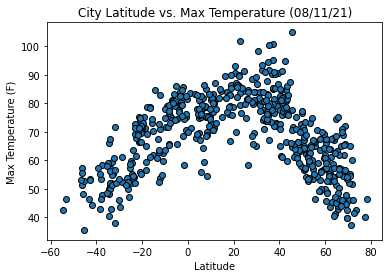

In [14]:
#Build Scatter Plot
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           label="Cities")

#Create additional properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Save Image
plt.savefig("../output_data/Lat_vs._Temp.png")

#Show the plot
plt.show()

## Latitude vs. Humidity Plot

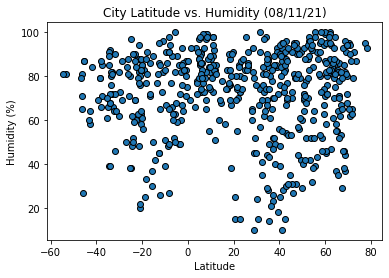

In [15]:
#Build Scatter Plot
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           label="Cities")

#Create additional properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save Image
plt.savefig("../output_data/Lat_vs._Humidity.png")

#Show the plot
plt.show()

## Latitude vs. Cloudiness Plot

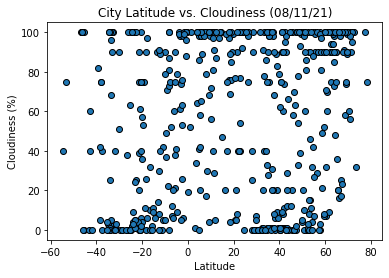

In [16]:
#Build Scatter Plot
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           label="Cities")

#Create additional properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Save Image
plt.savefig("../output_data/Lat_vs._Cloudiness.png")

#Show the plot
plt.show()

## Latitude vs. Wind Speed Plot

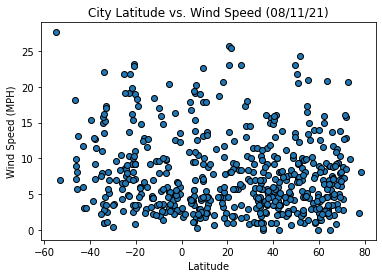

In [17]:
#Build Scatter Plot
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           label="Cities")

#Create additional properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

#Save Image
plt.savefig("../output_data/Lat_vs._Wind.png")

#Show the plot
plt.show()

## Linear Regression

In [25]:
#Create a function to build Linear Regression Plots
def plot_lin_reg(x_values, y_values, title, text_coordinates):
    
    #Run Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_equation, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show

In [20]:
#Separate Northern and Southern Hemispheres into two different DataFrames
northern_hemi = city_data_pd.loc[(city_data_pd["Latitude"] >= 0)]
southern_hemi = city_data_pd.loc[(city_data_pd["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.43123422182330723


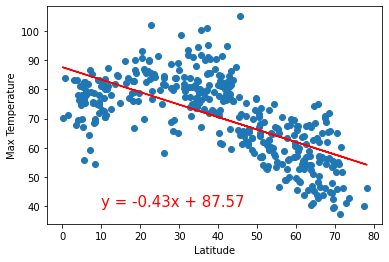

In [32]:
#Linear Regression
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Max Temperature"]
plot_lin_reg(x_values, y_values, 'Max Temperature', (10,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6140994509288381


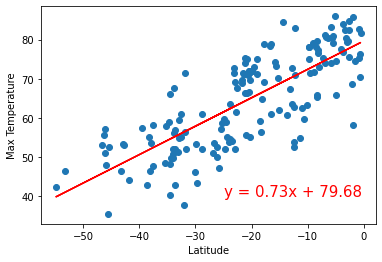

In [35]:
#Linear Regression
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Max Temperature"]
plot_lin_reg(x_values, y_values, 'Max Temperature', (-25,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006736554904078053


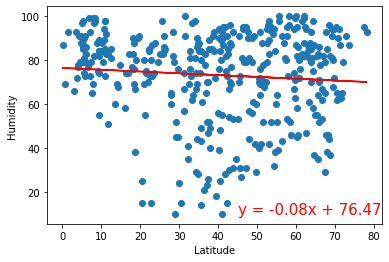

In [39]:
#Linear Regression
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]
plot_lin_reg(x_values, y_values, 'Humidity', (45,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 2.7242906028550932e-06


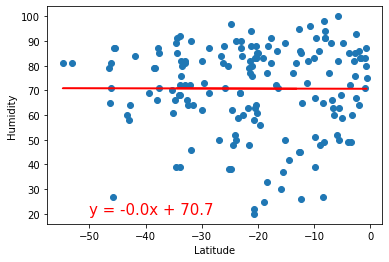

In [42]:
#Linear Regression
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Humidity"]
plot_lin_reg(x_values, y_values, 'Humidity', (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00042010149500916065


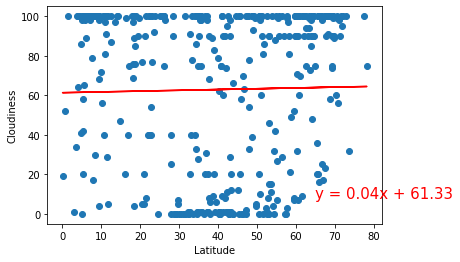

In [46]:
#Linear Regression
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Cloudiness"]
plot_lin_reg(x_values, y_values, 'Cloudiness', (65,8))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.017451149392574247


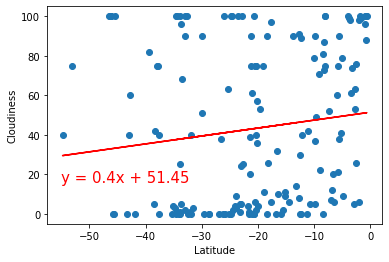

In [49]:
#Linear Regression
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Cloudiness"]
plot_lin_reg(x_values, y_values, 'Cloudiness', (-55,16))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0008681394872955175


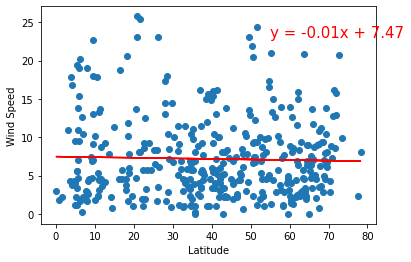

In [52]:
#Linear Regression
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]
plot_lin_reg(x_values, y_values, 'Wind Speed', (55,23))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03881834564639421


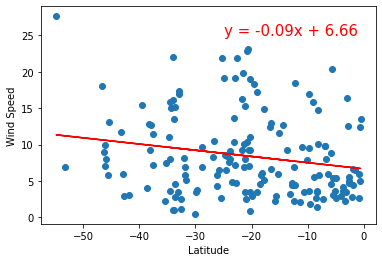

In [54]:
#Linear Regression
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]
plot_lin_reg(x_values, y_values, 'Wind Speed', (-25,25))